In [1]:
import pandas as pd
import datetime
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

import seaborn as sns

from sklearn import preprocessing

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression

In [3]:
file_url="Telco.csv"

df=pd.read_csv(file_url)

In [4]:
df.sample(10)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2827,1845-ZLLIG,Germany,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.15,50.15,No
3678,6473-ULUHT,Germany,Male,0,Yes,Yes,16,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,84.90,1398.25,No
5213,7668-XCFYV,Germany,Female,1,Yes,No,17,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.55,1614.7,No
1362,2568-BRGYX,Germany,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
6360,8073-IJDCM,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,20.3,Yes
2918,2761-XECQW,Germany,Male,1,Yes,No,8,No,No phone service,DSL,...,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,43.35,371.4,No
1621,6352-TWCAU,Germany,Female,0,No,No,35,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.45,3029.1,Yes
2809,4360-QRAVE,Germany,Male,1,No,No,37,No,No phone service,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,36.65,1315,No
2640,4391-LNRXK,Germany,Male,0,No,No,22,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),94.95,2142.8,No
1682,9225-BZLNZ,Germany,Male,0,Yes,No,72,Yes,Yes,DSL,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,85.25,6083.1,No


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
serviceDict={}
serviceDict['English']=[]
serviceDict['French']=[]
serviceDict['German']=[]
serviceDict['gender']=[]
serviceDict['SeniorCitizen']=[]
serviceDict['Partner']=[]
serviceDict['Dependents']=[]
serviceDict['Tenure']=[]
serviceDict['PhoneService']=[]
serviceDict['MultipleLines']=[]
serviceDict['InternetService']=[]
serviceDict['OnlineSecurity']=[]
serviceDict['OnlineBackup']=[]
serviceDict['DeviceProtection']=[]
serviceDict['TechSupport']=[]
serviceDict['StreamingTV']=[]
serviceDict['StreamingMovies']=[]
serviceDict['Contact']=[]
serviceDict['PaperlessBilling']=[]
serviceDict['PaymentMethodBank']=[]
serviceDict['PaymentMethodCredit']=[]
serviceDict['PaymentMethodCheck']=[]
serviceDict['PaymentMethodMail']=[]
serviceDict['MonthlyCharges']=[]
serviceDict['Total']=[]
serviceDict['churn']=[]

for index,row in df.iterrows():
    
    region=row['Region']
    gender=row['gender']
    senior=row['SeniorCitizen']
    partner=row['Partner']
    dependent=row['Dependents']
    tenure=row['tenure']
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    streamingMovies=row['StreamingMovies']
    contact=row['Contract']
    paperless=row['PaperlessBilling']
    paymentMethod=row['PaymentMethod']
    charge=row["MonthlyCharges"]
    total=row['TotalCharges']
    churn=row["Churn"]

    if region=='England':
        serviceDict['English'].append(1)
    else:
        serviceDict['English'].append(0)
        
    if region=='France':
        serviceDict['French'].append(1)
    else:
        serviceDict['French'].append(0)
        
    if region=='Germany':
        serviceDict['German'].append(1)
    else:
        serviceDict['German'].append(0)
    
    if gender=='Male':
        serviceDict['gender'].append(1)
    else:
        serviceDict['gender'].append(0)
        
    serviceDict['SeniorCitizen'].append(senior)
    
    if partner=='Yes':
        serviceDict['Partner'].append(1)
    else:
        serviceDict['Partner'].append(0)
        
    if dependent=='Yes':
        serviceDict['Dependents'].append(1)
    else:
        serviceDict['Dependents'].append(0)
        
    serviceDict['Tenure'].append(tenure)
    
    if phone_service=="Yes":
        serviceDict['PhoneService'].append(1)
    else:
        serviceDict['PhoneService'].append(0)
        
    if multiple_line=="Yes":
        serviceDict['MultipleLines'].append(1)
    else:
        serviceDict['MultipleLines'].append(0)
        
    if internet_service!="No":
        serviceDict['InternetService'].append(1)
    else:
        serviceDict['InternetService'].append(0)
        
    if online_security=="Yes":
        serviceDict['OnlineSecurity'].append(1)
    else:
        serviceDict['OnlineSecurity'].append(0)
        
    if online_backup=="Yes":
        serviceDict['OnlineBackup'].append(1)
    else:
        serviceDict['OnlineBackup'].append(0)
        
    if device_protection=="Yes":
        serviceDict['DeviceProtection'].append(1)
    else:
        serviceDict['DeviceProtection'].append(0)
        
    if tech_support=="Yes":
        serviceDict['TechSupport'].append(1)
    else:
        serviceDict['TechSupport'].append(0)
        
    if streamingTV=="Yes":
        serviceDict['StreamingTV'].append(1)
    else:
        serviceDict['StreamingTV'].append(0)
        
    if streamingMovies=="Yes":
        serviceDict['StreamingMovies'].append(1)
    else:
        serviceDict['StreamingMovies'].append(0)
       
    if contact=='One year':
        serviceDict['Contact'].append(1)
    elif contact=='Two year':
        serviceDict['Contact'].append(2)
    else:
        serviceDict['Contact'].append(1/12)
        
    if paperless=='Yes':
        serviceDict['PaperlessBilling'].append(1)
    else:
        serviceDict['PaperlessBilling'].append(0)
        
    if paymentMethod=="Bank transfer (automatic)":
        serviceDict['PaymentMethodBank'].append(1)
    else:
        serviceDict['PaymentMethodBank'].append(0)
        
    if paymentMethod=="Credit card (automatic)":
        serviceDict['PaymentMethodCredit'].append(1)
    else:
        serviceDict['PaymentMethodCredit'].append(0)
        
    if paymentMethod=="Electronic check":
        serviceDict['PaymentMethodCheck'].append(1)
    else:
        serviceDict['PaymentMethodCheck'].append(0)
        
    if paymentMethod=="Mailed check":
        serviceDict['PaymentMethodMail'].append(1)
    else:
        serviceDict['PaymentMethodMail'].append(0)
    
    serviceDict['MonthlyCharges'].append(charge)
    
    serviceDict['Total'].append(total)
    
    if churn=='Yes':
        serviceDict['churn'].append(1)
    else:
        serviceDict['churn'].append(0)

In [7]:
df_service = pd.DataFrame(serviceDict) 
df_service.sample(5)

,English,French,German,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,...,StreamingMovies,Contact,PaperlessBilling,PaymentMethodBank,PaymentMethodCredit,PaymentMethodCheck,PaymentMethodMail,MonthlyCharges,Total,churn
3020,0,0,1,1,0,0,1,33,0,0,...,0,1.000000,0,0,1,0,0,34.05,1113.95,0
6079,0,0,1,0,0,1,0,25,1,1,...,0,0.083333,0,0,0,1,0,54.10,1373,0
6163,0,0,1,0,0,1,0,19,1,1,...,1,0.083333,1,0,0,1,0,89.10,1620.8,0
5773,0,0,1,0,0,0,0,35,1,0,...,0,0.083333,0,0,0,1,0,60.55,1982.6,0
1839,0,0,1,0,0,0,0,4,1,1,...,0,2.000000,1,0,1,0,0,25.30,116.95,0


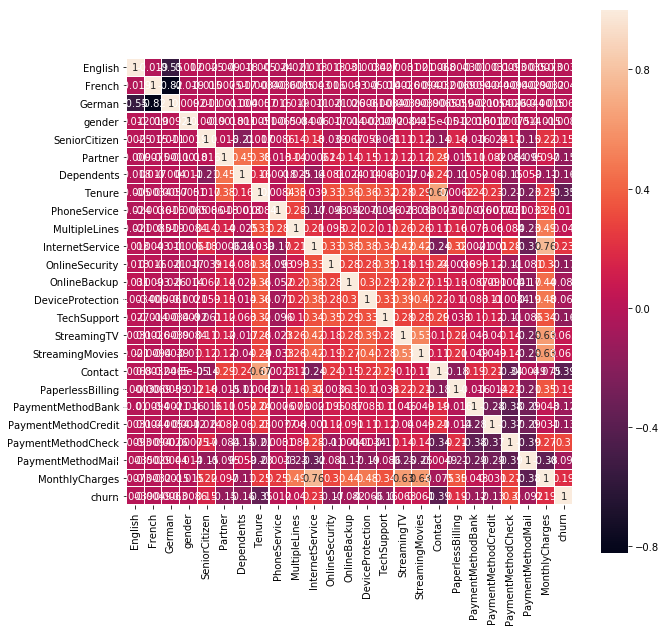

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df_service.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [9]:
bins = [0,12,24,36,48,60,72,84]
df['tenure_bin'] = pd.cut(df['tenure'],bins,labels=[1,2,3,4,5,6,7])

In [10]:
bins = [0,25,50,75,100,125]
df['charge_bin'] = pd.cut(df['tenure'],bins,labels=[1,2,3,4,5])

In [11]:
df.sample(10)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,charge_bin
6468,2599-CZABP,Germany,Male,0,Yes,No,14,Yes,No,DSL,...,No,No,One year,No,Electronic check,44.60,641.25,No,2,1
1033,2632-TACXW,Germany,Female,0,Yes,No,62,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.65,1416.75,No,6,3
4690,7036-ZZKBD,Germany,Male,0,Yes,No,31,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Credit card (automatic),66.40,2019.8,No,3,2
2493,8622-ZLFKO,Germany,Female,0,Yes,No,6,Yes,Yes,Fiber optic,...,No,Yes,Month-to-month,Yes,Electronic check,90.75,512.25,No,1,1
928,0862-PRCBS,Germany,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,...,Yes,Yes,Two year,Yes,Credit card (automatic),103.75,7039.45,No,6,3
1381,3717-OEAUQ,Germany,Male,0,No,No,2,Yes,No,Fiber optic,...,No,No,Month-to-month,No,Mailed check,70.70,129.2,No,1,1
590,0619-OLYUR,Germany,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Two year,Yes,Credit card (automatic),111.90,8071.05,No,6,3
4405,8417-FMLZI,Germany,Male,0,Yes,Yes,6,Yes,No,Fiber optic,...,No,Yes,Month-to-month,Yes,Credit card (automatic),83.55,477.55,Yes,1,1
4805,2207-RYYRL,Germany,Male,0,Yes,Yes,52,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Mailed check,24.55,1331.05,No,5,3
2743,2323-ARSVR,Germany,Male,0,Yes,No,67,Yes,No,Fiber optic,...,Yes,Yes,Two year,Yes,Electronic check,111.05,7321.05,No,6,3


In [27]:
inputs_regress=[]
outputs_regress=[]

for index,row in df.iterrows():
    
    temp_input=[0]*30
    
    senior=row['SeniorCitizen']
    partner=row['Partner']
    dependent=row['Dependents']
    tenure_bin=row['tenure_bin']
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    paperless=row['PaperlessBilling']
    paymentMethod=row['PaymentMethod']
    charge_bin=row['charge_bin']
    churn=row["Churn"]
    
    temp_input[1]=senior
    
    if partner=='Yes':
        temp_input[2]=1
    
    if dependent=='Yes':
        temp_input[3]=1
    
    if tenure_bin==1:
        temp_input[4]=1
    elif tenure_bin==2:
        temp_input[5]=1
    elif tenure_bin==3:
        temp_input[6]=1
    elif tenure_bin==4:
        temp_input[7]=1
    elif tenure_bin==5:
        temp_input[8]=1
    elif tenure_bin==6:
        temp_input[9]=1
    elif tenure_bin==7:
        temp_input[10]=1
    
    if phone_service=="Yes":
        temp_input[11]=1
        
    if multiple_line=="Yes":
        temp_input[12]
        
    if internet_service=="DSL":
        temp_input[13]=1
    elif internet_service=="Fiber optic":
        temp_input[14]=1
        
    if online_security=="Yes":
        temp_input[15]=1
        
    if online_backup=="Yes":
        temp_input[16]=1
        
    if device_protection=="Yes":
        temp_input[17]=1
        
    if tech_support=="Yes":
        temp_input[18]=1
        
    if streamingTV=="Yes":
        temp_input[19]=1
        
    if paperless=='Yes':
        temp_input[20]=1
        
    if paymentMethod=="Bank transfer (automatic)":
        temp_input[21]=1
    elif paymentMethod=="Credit card (automatic)":
        temp_input[22]=1
    elif paymentMethod=="Electronic check":
        temp_input[23]=1
    else:
        temp_input[24]=1

    if charge_bin==1:
        temp_input[25]=1
    elif charge_bin==2:
        temp_input[26]=1
    elif charge_bin==3:
        temp_input[27]=1
    elif charge_bin==4:
        temp_input[28]=1
    elif charge_bin==5:
        temp_input[29]=1
        
    inputs_regress.append(temp_input)
    
    if churn=='Yes':
        outputs_regress.append([1])
    else:
        outputs_regress.append([0])

In [28]:
inputs_regress_np=np.array(inputs_regress)
outputs_regress_np=np.array(outputs_regress)

In [29]:
inputs_regress_train,inputs_regress_test, outputs_regress_train,outputs_regress_test = train_test_split(inputs_regress_np, outputs_regress_np, test_size=0.2)

In [30]:
clf = LogisticRegression(random_state=0).fit(inputs_regress_train, outputs_regress_train)
clf.score(inputs_regress_train, outputs_regress_train)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7981895633652822

In [31]:
predict=clf.predict(inputs_regress_train)

confusion_matrix(outputs_regress_train, predict)

array([[3783,  362],
       [ 775,  714]], dtype=int64)

In [32]:
precision=precision_score(outputs_regress_train,predict, average='macro')
recall=recall_score(outputs_regress_train, predict, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7467690290041122
Model Recall: 0.696091158240446


In [33]:
prob = clf.predict_proba(inputs_regress_train)[:, 1]
roc_auc_score(outputs_regress_train,prob)

0.8391668374675241

In [34]:
clf.score(inputs_regress_test, outputs_regress_test)

0.7913413768630234

In [35]:
predict=clf.predict(inputs_regress_test)

confusion_matrix(outputs_regress_test, predict)

array([[929, 100],
       [194, 186]], dtype=int64)

Confusion matrix
[[929 100]
 [194 186]]


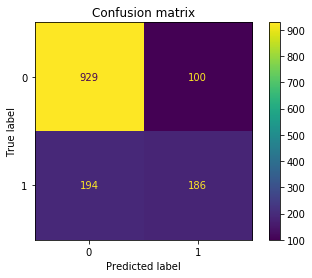

In [36]:
disp = plot_confusion_matrix(clf, inputs_regress_test, outputs_regress_test,values_format="2")

title="Confusion matrix"

disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

In [37]:
TP=disp.confusion_matrix[1][1]
TN=disp.confusion_matrix[0][0]
FP=disp.confusion_matrix[0][1]
FN=disp.confusion_matrix[1][0]
print(TP,TN,FP,FN)

186 929 100 194


In [38]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.6503496503496503
Model Recall: 0.48947368421052634


Text(0.5, 1.0, 'Precision-Recall curve')

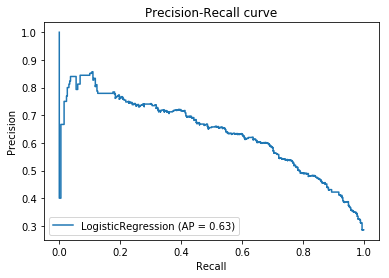

In [39]:
disp = plot_precision_recall_curve(clf, inputs_regress_test, outputs_regress_test)
plt.title("Precision-Recall curve")

In [40]:
prob = clf.predict_proba(inputs_regress_test)[:, 1]
roc_auc_score(outputs_regress_test,prob)

0.8337770446524475

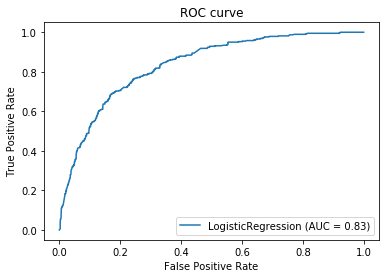

In [41]:
svc_disp = plot_roc_curve(clf, inputs_regress_test, outputs_regress_test)
plt.title("ROC curve")
plt.show()